# Loan_Approval_Prediction

In [1]:
#Ajeet Pandey
#Importing Python Libraries
import pandas  as pd 
import numpy   as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading training dataset in a dataframe using Pandas Python library
Train_loan_Df=pd.read_csv("F:/download/data csv/train_LoanStatus.csv")
Train_loan_Df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [3]:
Train_loan_Df.shape #No. of records = 614 and Attributes = 13

(614, 13)

In [4]:
Train_loan_Df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
Train_loan_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
Train_loan_Df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
Train_loan_Df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [8]:
#Data Cleansing by sklearn's SimpleImputer

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.NAN, strategy='most_frequent', fill_value=None, verbose=0, copy=True)
imp.fit(Train_loan_Df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
Train_loan_Df_Im= imp.transform(Train_loan_Df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [9]:
Train_loan_Df_Im=pd.DataFrame(data=Train_loan_Df_Im,
                    columns=['ApplicantIncome_imp','CoapplicantIncome_imp','LoanAmount_imp','Loan_Amount_Term_imp']) 
Train_loan_Df_Im_withoutNan=Train_loan_Df_Im.join(Train_loan_Df)


In [10]:
Train_loan_Df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [11]:
Train_loan_Df_Im_withoutNan.groupby('Loan_Status').mean()

,ApplicantIncome_imp,CoapplicantIncome_imp,LoanAmount_imp,Loan_Amount_Term_imp,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,
N,5446.078125,1877.807292,149.432292,344.56250,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,143.661137,341.43128,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [12]:
Train_loan_Df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [13]:
Train_loan_Df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
pd.crosstab(Train_loan_Df.Loan_Status,Train_loan_Df.Credit_History, normalize=True)*100

Credit_History,0.0,1.0
Loan_Status,,
N,14.539007,17.198582
Y,1.241135,67.021277


# 67% of customers take loan and have credit history

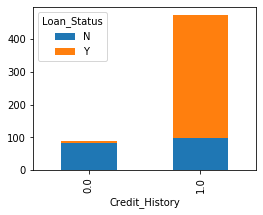

In [15]:
pd.crosstab(index=Train_loan_Df["Credit_History"], columns=Train_loan_Df["Loan_Status"]).plot(kind="bar",
    figsize=(4,3),stacked=True)

In [16]:
pd.crosstab(Train_loan_Df.Gender,Train_loan_Df.Loan_Status,normalize='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [17]:
Train_loan_Df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

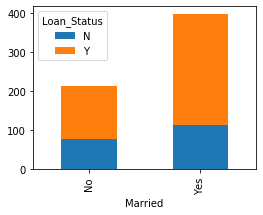

In [18]:
pd.crosstab(Train_loan_Df.Married,Train_loan_Df.Loan_Status).plot(kind='bar',figsize=(4,3),stacked=True)

In [19]:
pd.crosstab(Train_loan_Df.Married,Train_loan_Df.Loan_Status,normalize='index')

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


In [20]:
pd.crosstab(Train_loan_Df.Dependents,Train_loan_Df.Loan_Status,normalize='index')

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


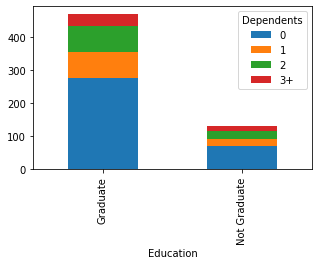

In [21]:
pd.crosstab(Train_loan_Df.Education,Train_loan_Df.Dependents).plot(kind='bar',figsize=(5,3),stacked=True)

In [22]:
pd.crosstab(Train_loan_Df.Education,Train_loan_Df.Loan_Status,normalize='index')

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


# Graduate client has 10% more chaces to get loan Approval than not gratudate.

In [23]:
pd.crosstab(Train_loan_Df.Self_Employed,Train_loan_Df.Loan_Status,normalize='index')

Loan_Status,N,Y
Self_Employed,,
No,0.314000,0.686000
Yes,0.317073,0.682927


# Equavelent chance to get loan for employed or not employed clients

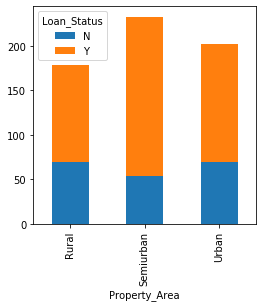

In [24]:
pd.crosstab(Train_loan_Df.Property_Area,Train_loan_Df.Loan_Status).plot(kind='bar',figsize=(4,4),stacked=True)

In [25]:
pd.crosstab(Train_loan_Df.Loan_Status,Train_loan_Df.Property_Area,normalize='columns')

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


# Chances of getting a loan will be higher for Applicants from Urban Areas 

In [26]:
#sns.heatmap(Train_loan_Df.corr(), annot=True, fmt=".2f")

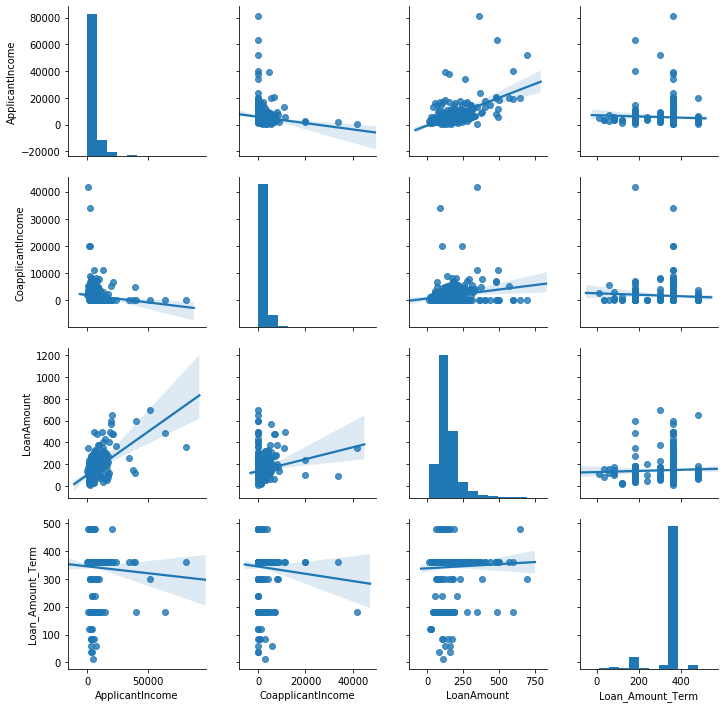

In [27]:
sns.pairplot(Train_loan_Df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].dropna(),kind="reg")

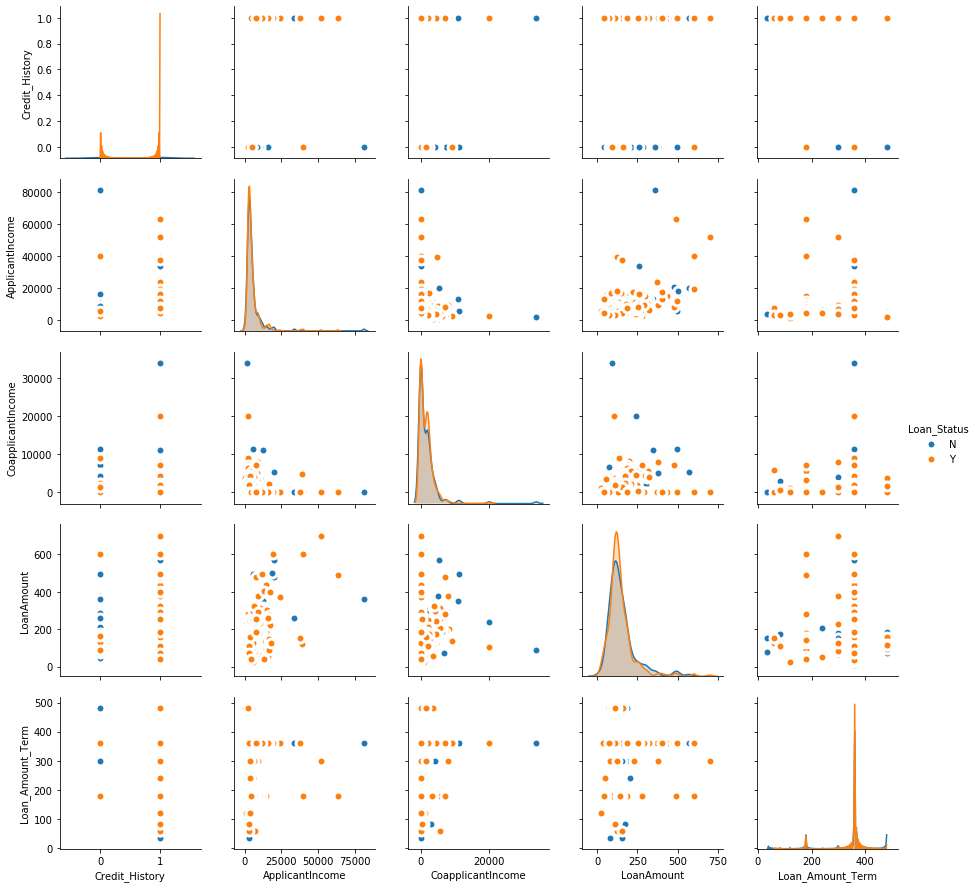

In [28]:
sns.pairplot(Train_loan_Df[['Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']].dropna(), kind="scatter", hue="Loan_Status", plot_kws=dict(s=80, edgecolor="white", linewidth=3))

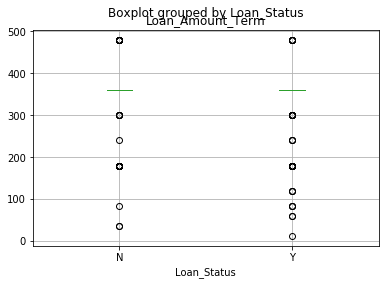

In [29]:
Train_loan_Df.boxplot(column='Loan_Amount_Term', by='Loan_Status')

# Logistic Regression

In [30]:
data=Train_loan_Df
cat_vars=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Credit_History']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,5)
data=data[to_keep].dropna()
data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y=data['Loan_Status']

In [32]:
data_X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Credit_History_0.0         0
Credit_History_1.0         0
dtype: int64

In [33]:
data_X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0'],
      dtype='object')

In [34]:
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
rfe = rfe.fit(data_X, data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklea

[False False False False False  True False False False False False  True
 False False False False False  True False  True  True]
[17 16 14 15  9  1  3  8  7  6  5  1  4 12 10 13  2  1 11  1  1]


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklea

In [36]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on Train test data set: {:.2f}'.format(logreg.score(X_test, y_test)*100),'%')

Accuracy of logistic regression classifier on Train test data set: 83.33 %


In [38]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#print(classification_report(y_test, y_pred))

[[ 27  23]
 [  6 118]]


In [39]:
data_X['total_income']=data_X['ApplicantIncome']+data_X['CoapplicantIncome']

In [40]:
Train_loan_Df['total_income']=Train_loan_Df['ApplicantIncome']+Train_loan_Df['CoapplicantIncome']
take_loan=list(Train_loan_Df[Train_loan_Df['Loan_Status']=='Y']['total_income'])
not_take_loan=list(Train_loan_Df[Train_loan_Df['Loan_Status']=='Y']['total_income'])
colors = ['#009E73', '#D55E00']

#sns.heatmap(take_loan.corr(), annot=True, fmt=".2f")
#plot.hist([take_loan,not_take_loan], 30,stacked=True,color=colors,normed=True)
#plot.legend()

In [41]:
Train_loan_Df['total_income']=Train_loan_Df['ApplicantIncome']+Train_loan_Df['CoapplicantIncome']
take_loan=list(Train_loan_Df[Train_loan_Df['Loan_Status']=='Y']['total_income'])
not_take_loan=list(Train_loan_Df[Train_loan_Df['Loan_Status']=='Y']['total_income'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_X.drop(['ApplicantIncome','CoapplicantIncome'],axis=1), data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100),'%')

Accuracy of logistic regression classifier on test set: 82.76 %


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 28  22]
 [  8 116]]
              precision    recall  f1-score   support

           N       0.78      0.56      0.65        50
           Y       0.84      0.94      0.89       124

    accuracy                           0.83       174
   macro avg       0.81      0.75      0.77       174
weighted avg       0.82      0.83      0.82       174



#  Decsion Tree

In [44]:

import numpy as np
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [45]:
from sklearn.tree import DecisionTreeClassifier  
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=0)
Dtree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)
print(Dtree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [46]:
y_pred = Dtree.predict(X_test)

In [47]:
print("The prediction accuracy is: ",Dtree.score(X_test,y_test)*100,"%")

The prediction accuracy is:  70.11494252873564 %


In [48]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[35 15]
 [37 87]]
              precision    recall  f1-score   support

           N       0.49      0.70      0.57        50
           Y       0.85      0.70      0.77       124

    accuracy                           0.70       174
   macro avg       0.67      0.70      0.67       174
weighted avg       0.75      0.70      0.71       174

